Computational Neurophysiology Laboratory, Brain Institute, UFRN, Brazil<br>
Rodrigo MM Santiago<br>
2023

# WFbC
*Waveform-based classification of dentate spikes*

### Function import

**Custom functions**

In [1]:
import dentatespike as ds

**Scientific modules and functions**

In [2]:
import numpy as np                           # numerical operations
import pickle                                # for data saving
from sklearn.metrics import confusion_matrix # confusion matrix

# for plotting
import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib inline

### Data loading

In [3]:
LFP              = pickle.load(open("LFP.txt","rb"))              # LFP (16 channels)
srate            = pickle.load(open("srate.txt","rb"))            # sampling rate (Hz)
DS_ind           = pickle.load(open("DS_ind.txt","rb"))           # DS indexes
DS_waveforms     = pickle.load(open("DS_waveforms.txt","rb"))     # DS waveforms
t_waveform       = pickle.load(open("t_waveform.txt","rb"))       # time vector of the DS waveforms
DS_classes_CSDbC = pickle.load(open("DS_classes_CSDbC.txt","rb")) # DS classes by CSDbC

### DS classification based on waveform

In [4]:
ind_win = (t_waveform>=-15)*(t_waveform<=15) # indexes of the time window used for classification
t_waveform[ind_win]

array([-15., -14., -13., -12., -11., -10.,  -9.,  -8.,  -7.,  -6.,  -5.,
        -4.,  -3.,  -2.,  -1.,   0.,   1.,   2.,   3.,   4.,   5.,   6.,
         7.,   8.,   9.,  10.,  11.,  12.,  13.,  14.,  15.])

In [5]:
# Input data
X      = np.array(DS_waveforms) # all waveforms
X_win  = np.array(X)[:,ind_win] # all waveforms from -15 to 15 ms

In [6]:
DS_classes_WFbC,DS1_waveforms_WFbC,DS2_waveforms_WFbC,_,_ = ds.classification.WFbC(X,X_win)

In [7]:
# Waveforms of each DS type
DS1_waveforms_WFbC = DS_waveforms[(DS_classes_WFbC*-1+1).astype(bool),:]
DS2_waveforms_WFbC = DS_waveforms[(DS_classes_WFbC).astype(bool),:]

Man waveforms and widths of each DS type:

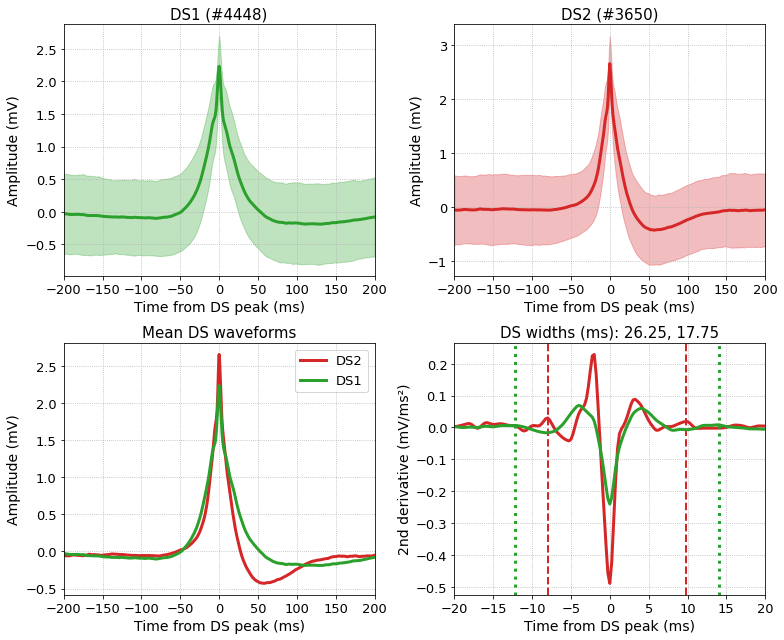

In [8]:
ds.analysis.plotDSclass(DS_classes_WFbC,DS1_waveforms_WFbC,DS2_waveforms_WFbC,t_waveform);

### CSD profiles of each DS type

In [9]:
CSD, csd_t, csd_ch_list = ds.analysis.CSDmatrix(LFP, DS_ind) # computes the CSD of each DS

In [10]:
ind_DS1_WFbC = np.concatenate(np.argwhere(DS_classes_WFbC*(-1)+1)) # DS1 indexes in DS classes array
ind_DS2_WFbC = np.concatenate(np.argwhere(DS_classes_WFbC))        # DS2 indexes in DS classes array

CSD_DS1_WFbC = CSD[ind_DS1_WFbC] # CSD profiles of DS1
CSD_DS2_WFbC = CSD[ind_DS2_WFbC] # CSD profiles of DS2

Mean CSD profiles of each DS type:

In [11]:
DS1_ind_WFbC = DS_ind[(DS_classes_WFbC*-1+1).astype(bool)] # DS1 indexes
DS2_ind_WFbC = DS_ind[DS_classes_WFbC.astype(bool)]        # DS2 indexes

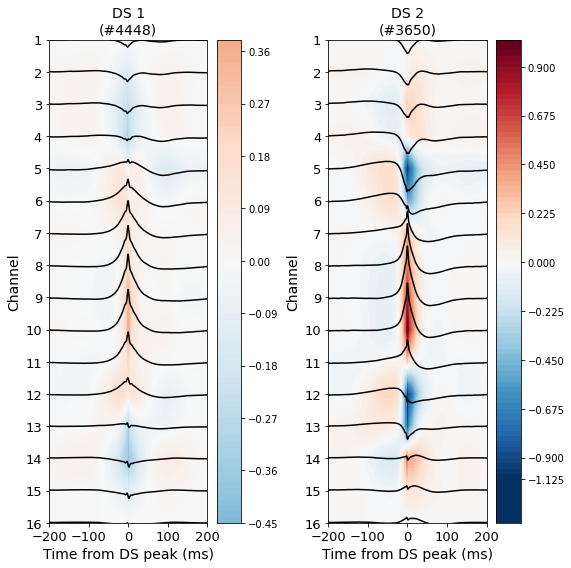

In [12]:
plt.figure(figsize=(8,8))

plt.subplot(121)
ds.analysis.plotDSCSD(csd_t,csd_ch_list,np.mean(CSD_DS1_WFbC,axis=0),'DS 1',
                    t_waveform,DS1_ind_WFbC,LFP)
plt.subplot(122)
ds.analysis.plotDSCSD(csd_t,csd_ch_list,np.mean(CSD_DS2_WFbC,axis=0),'DS 2',
                    t_waveform,DS2_ind_WFbC,LFP)

plt.tight_layout();

Concatenated CSDs for each DS type:

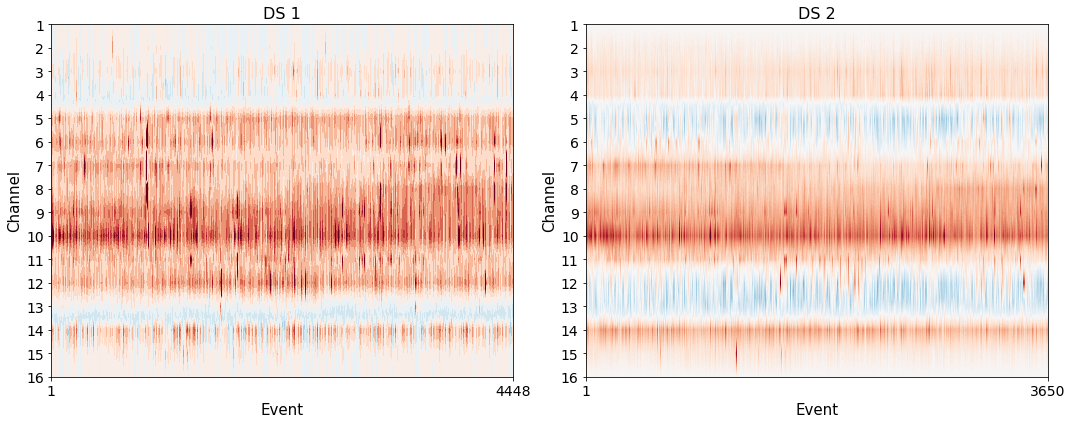

In [13]:
plt.figure(figsize=(15,6))

plt.subplot(121)
ds.analysis.plotConcCSD(CSD_DS1_WFbC,'DS 1',vrange=['std',4])

plt.subplot(122)
ds.analysis.plotConcCSD(CSD_DS2_WFbC,'DS 2',vrange=['std',4])

plt.tight_layout();

### Comparison with CSDbC (reference)

In [14]:
# Waveforms of each DS type
DS1_waveforms_CSDbC = DS_waveforms[(DS_classes_CSDbC*-1+1).astype(bool),:]
DS2_waveforms_CSDbC = DS_waveforms[(DS_classes_CSDbC).astype(bool),:]

# Indexes of each DS type classified by CSDbC
ind_DS1_CSDbC = np.concatenate(np.argwhere(DS_classes_CSDbC*(-1)+1)) # DS1 indexes in DS classes array
ind_DS2_CSDbC = np.concatenate(np.argwhere(DS_classes_CSDbC))        # DS2 indexes in DS classes array

Waveforms

In [15]:
# Colors to identify DS types and classification methods
cDS1_WFbC  = 'green'
cDS2_WFbC  = 'firebrick'
cDS1_CSDbC = 'mediumseagreen'
cDS2_CSDbC = 'lightcoral'

In [16]:
# Mean waveforms
DS1_mean_CSDbC = np.mean(DS1_waveforms_CSDbC,axis=0)
DS2_mean_CSDbC = np.mean(DS2_waveforms_CSDbC,axis=0)
DS1_mean_WFbC  = np.mean(DS1_waveforms_WFbC,axis=0)
DS2_mean_WFbC  = np.mean(DS2_waveforms_WFbC,axis=0)

In [17]:
# Function to plot labels and adjust graphs
def plotDSlabels(leg=True,legsize=13):
    plt.xlabel('Time from DS peak (ms)',size=15)
    plt.ylabel('Amplitude (mV)',size=15)
    plt.xticks(size=14)
    plt.yticks(size=14)
    plt.autoscale(enable=True,axis='x',tight=True)
    if leg: plt.legend(fontsize=legsize)
    plt.grid(linestyle='dotted');

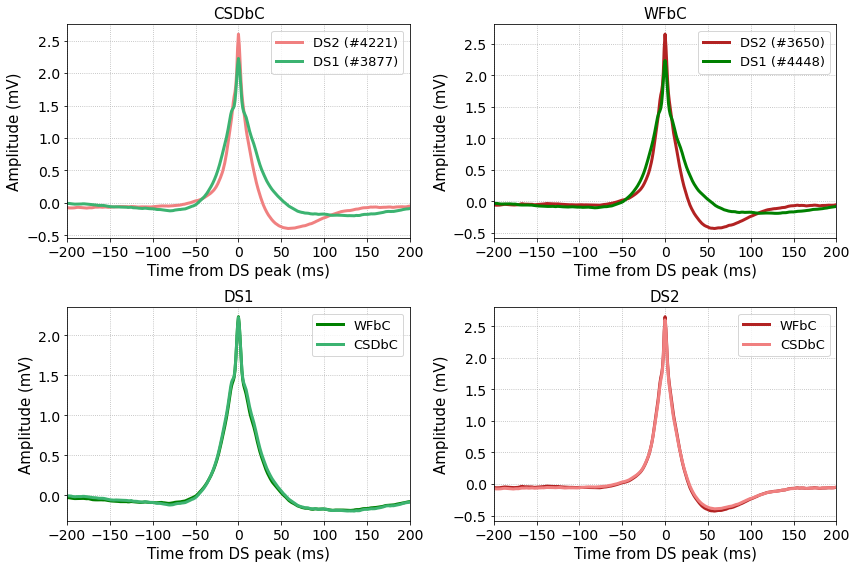

In [18]:
plt.figure(figsize=(12,8))

plt.subplot(221)
plt.plot(t_waveform,DS2_mean_CSDbC,cDS2_CSDbC,lw=3,label='DS2 (#'+str(len(ind_DS2_CSDbC))+')')
plt.plot(t_waveform,DS1_mean_CSDbC,cDS1_CSDbC,lw=3,label='DS1 (#'+str(len(ind_DS1_CSDbC))+')')
plt.title('CSDbC',size=15)
plotDSlabels()

plt.subplot(222)
plt.plot(t_waveform,DS2_mean_WFbC,cDS2_WFbC,lw=3,label='DS2 (#'+str(len(ind_DS2_WFbC))+')')
plt.plot(t_waveform,DS1_mean_WFbC,cDS1_WFbC,lw=3,label='DS1 (#'+str(len(ind_DS1_WFbC))+')')
plt.title('WFbC',size=15)
plotDSlabels()

plt.subplot(223)
plt.plot(t_waveform,DS1_mean_WFbC,cDS1_WFbC,lw=3,label='WFbC')
plt.plot(t_waveform,DS1_mean_CSDbC,cDS1_CSDbC,lw=3,label='CSDbC')
plt.title('DS1',size=15)
plotDSlabels()

plt.subplot(224)
plt.plot(t_waveform,DS2_mean_WFbC,cDS2_WFbC,lw=3,label='WFbC')
plt.plot(t_waveform,DS2_mean_CSDbC,cDS2_CSDbC,lw=3,label='CSDbC')
plt.title('DS2',size=15)
plotDSlabels()

plt.tight_layout();

Confusion matrix

In [19]:
cf      = confusion_matrix(DS_classes_CSDbC,DS_classes_WFbC)
cf_norm = confusion_matrix(DS_classes_CSDbC,DS_classes_WFbC,normalize='true') # normalized

print(cf)
print('\n')
print(cf_norm)

[[3564  313]
 [ 884 3337]]


[[0.91926747 0.08073253]
 [0.20942905 0.79057095]]


Accuracy

In [20]:
(cf[0,0]+cf[1,1])/np.sum(cf)

0.8521857248703384

Precision

In [21]:
# Precisions of DS-1 and DS-2 classification
precision = ds.classification.cm_metrics(cf)[:2]
precision

(0.8012589928057554, 0.9142465753424658)

Recall

In [22]:
# Recalls of DS-1 and DS-2 classification
recall = ds.classification.cm_metrics(cf)[2:]
recall

(0.9192674748516895, 0.7905709547500592)

DS 1	precision: 0.8	recall: 0.92
DS 2	precision: 0.91	recall: 0.79


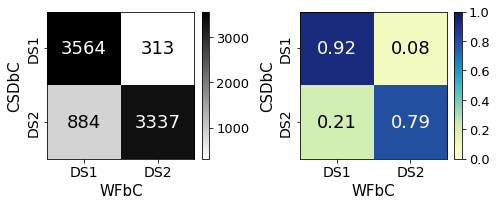

In [23]:
print('\033[1m'+'DS 1'+'\033[0m'+'\tprecision: '+str(np.round(precision[0],2))+'\trecall: '+str(np.round(recall[0],2)))
print('\033[1m'+'DS 2'+'\033[0m'+'\tprecision: '+str(np.round(precision[1],2))+'\trecall: '+str(np.round(recall[1],2)))

plt.figure(figsize=(7,3))
ds.classification.plotCM(cf,sp=121,v_min=np.min(cf),v_max=np.max(cf))
ds.classification.plotCM(cf_norm,'YlGnBu',sp=122)
plt.tight_layout();